In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input,Activation,Add,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [39]:
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 2
EPOCHS = 100

train_data_dir = "dataset/emot/emo"

In [40]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=60
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 750 images belonging to 5 classes.


Found 750 images belonging to 5 classes.


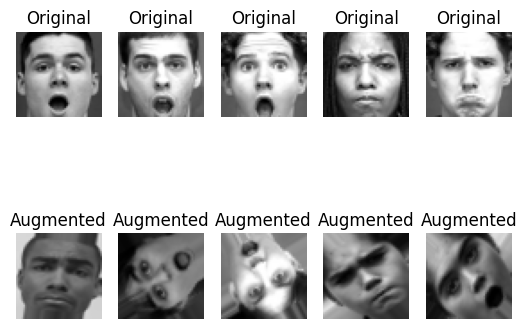

In [41]:
import matplotlib.pyplot as plt
train_datagen_no_aug = ImageDataGenerator(rescale=1./255)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=5,
    class_mode='categorical'
)

for i in range(5):
    batch = train_generator_no_aug.next()
    image = batch[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original")

for i in range(5):
    batch = train_generator.next()
    image = batch[0][0]
    plt.subplot(2, 5, i + 6)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Augmented")

plt.show()

In [42]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2023-12-17 10:52:11.288603: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-17 10:52:11.289047: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-17 10:52:11.289732: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device('/GPU:0'):
    model.fit(train_generator, epochs=EPOCHS)

Epoch 1/50


2023-12-17 10:52:12.947596: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/dropout_21/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


188/188 [==============================] - 2s 5ms/step - loss: 1.5309 - accuracy: 0.3093
Epoch 2/50
188/188 [==============================] - 1s 3ms/step - loss: 1.5282 - accuracy: 0.3267
Epoch 3/50
188/188 [==============================] - 1s 3ms/step - loss: 1.5131 - accuracy: 0.3320
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 1.5173 - accuracy: 0.3253
Epoch 5/50
188/188 [==============================] - 1s 3ms/step - loss: 1.5134 - accuracy: 0.3320
Epoch 6/50
188/188 [==============================] - 1s 3ms/step - loss: 1.5009 - accuracy: 0.3320
Epoch 7/50
188/188 [==============================] - 1s 3ms/step - loss: 1.5022 - accuracy: 0.3267
Epoch 8/50
188/188 [==============================] - 1s 3ms/step - loss: 1.4768 - accuracy: 0.3520
Epoch 9/50
188/188 [==============================] - 1s 3ms/step - loss: 1.4723 - accuracy: 0.3787
Epoch 10/50
188/188 [==============================] - 1s 3ms/step - loss: 1.4053 - accuracy: 0.4320
Epoch 11/5

In [44]:
model.save('test.keras')

In [45]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device('/GPU:0'):
    model.fit(train_generator, epochs=EPOCHS)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/shehab/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/shehab/.local/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/home/shehab/.local/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/shehab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/shehab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/shehab/.local/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/shehab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/shehab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/shehab/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_19353/3119848975.py", line 15, in <module>

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/home/shehab/.local/lib/python3.11/site-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[4,7] labels_size=[4,5]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_128502]

In [ ]:
model.save('emotion_detection_model_with_face_detection.keras')